In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor,VotingRegressor,BaggingRegressor
from catboost import CatBoostRegressor
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron

from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#import sweetviz
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection  import train_test_split, KFold,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import fbeta_score, make_scorer,mean_squared_error,mean_squared_log_error
from sklearn.metrics import mean_squared_error, make_scorer, r2_score
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import StackingRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import Ridge
#from lazypredict.Supervised import LazyRegressor

In [5]:
train=pd.read_csv(r'D:\Downloads\Machine Hack Projects\Workation Price Predictions\Train.csv')

In [6]:
test=pd.read_csv(r'D:\Downloads\Machine Hack Projects\Workation Price Predictions\Test.csv')

In [7]:
for col in train.columns:
    print(f' Total Unique Values are {len(train[col].unique())} in {col}')

 Total Unique Values are 21000 in Uniq Id
 Total Unique Values are 2204 in Package Name
 Total Unique Values are 5 in Package Type
 Total Unique Values are 565 in Destination
 Total Unique Values are 966 in Itinerary
 Total Unique Values are 565 in Places Covered
 Total Unique Values are 495 in Travel Date
 Total Unique Values are 6060 in Hotel Details
 Total Unique Values are 2 in Start City
 Total Unique Values are 314 in Airline
 Total Unique Values are 3 in Flight Stops
 Total Unique Values are 4 in Meals
 Total Unique Values are 1714 in Sightseeing Places Covered
 Total Unique Values are 10 in Cancellation Rules
 Total Unique Values are 17138 in Per Person Price


In [8]:
for col in test.columns:
    print(f' Total Unique Values are {len(test[col].unique())} in {col}')

 Total Unique Values are 9000 in Uniq Id
 Total Unique Values are 2065 in Package Name
 Total Unique Values are 5 in Package Type
 Total Unique Values are 551 in Destination
 Total Unique Values are 941 in Itinerary
 Total Unique Values are 552 in Places Covered
 Total Unique Values are 460 in Travel Date
 Total Unique Values are 3693 in Hotel Details
 Total Unique Values are 2 in Start City
 Total Unique Values are 216 in Airline
 Total Unique Values are 3 in Flight Stops
 Total Unique Values are 4 in Meals
 Total Unique Values are 1476 in Sightseeing Places Covered
 Total Unique Values are 7 in Cancellation Rules


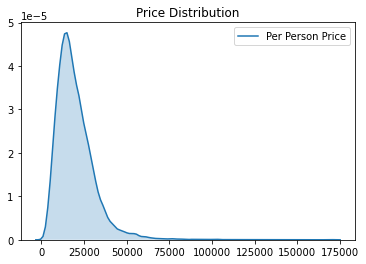

In [9]:
%matplotlib inline
sns.kdeplot(data=train['Per Person Price'].astype(int),shade=True)
plt.title('Price Distribution')
plt.show()

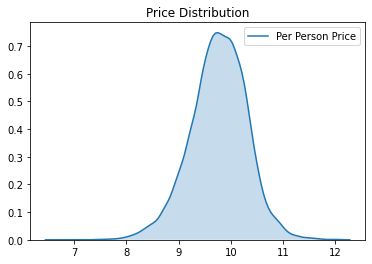

In [10]:
%matplotlib inline
sns.kdeplot(data=np.log1p(train['Per Person Price']),shade=True)
plt.title('Price Distribution')
plt.show()

In [11]:
df2=train.copy()

In [12]:
# 'Places Covered' was similar to 'Destination' hence removed and 'Uniq Id'  was completely unique for all rows therefore did not make sense to be used
df2.drop(['Places Covered', 'Uniq Id','Travel Date'], axis=1, inplace=True)
 
test.drop(['Places Covered', 'Uniq Id','Travel Date'], axis=1, inplace=True)

In [13]:
df2['Total Destinations Covered']=df2['Destination'].apply(lambda x: len(x.split('|')))
test['Total Destinations Covered'] = test['Destination'].apply(lambda x: len(x.split('|')))

In [14]:
df2.head()

,Package Name,Package Type,Destination,Itinerary,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price,Total Destinations Covered
0,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0,4
1,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5,3
2,Might of Mewar- Udaipur and Chittorgarh,Luxury,Udaipur|Chittorgarh,2N Udaipur . 1N Chittorgarh,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,New Delhi,IndiGo,0,4,Lake Pichola | Jag Mandir Palace | Saheliyon ...,Cancellation any time after making the 1st pay...,12421.5,2
3,Colorful Kerala ( Romantic Getaway ),Premium,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,Elixir Hills Suites Resort & Spa-MMT Holidays ...,New Delhi,IndiGo,0,5,Mattupetty Dam | Echo Point | Tata Tea Museum...,Cancellation any time after making the 1st pay...,35967.0,4
4,A Week In Bangkok & Pattaya,Premium,Pattaya|Bangkok,4N Pattaya . 3N Bangkok,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,New Delhi,Spicejet|Go Air,0,5,"Coral Island Tour with Indian Lunch, Join Spe...",Cancellation any time after making the 1st pay...,25584.0,2


In [15]:
df2['Sightseeing Places Covered'].head()

0                                        Not Available
1     Dal Lake | Avantipura Ruins | Mughal Gardens ...
2     Lake Pichola | Jag Mandir Palace | Saheliyon ...
3     Mattupetty Dam | Echo Point | Tata Tea Museum...
4     Coral Island Tour with Indian Lunch, Join Spe...
Name: Sightseeing Places Covered, dtype: object

In [16]:
df2['Total Sightseeing Places Covered'] = df2['Sightseeing Places Covered'].apply(lambda x: len(x.split('|')) if x != 'Not Available' else -1)

test['Total Sightseeing Places Covered'] = test['Sightseeing Places Covered'].apply(lambda x: len(x.split('|')) if x != 'Not Available' else -1)

In [17]:
# Feature having total no. of days in respective trips
import re
df2['Total days'] = df2['Itinerary'].apply(lambda x: sum(int(i) for i in (re.findall(r'[0-9]', x))))

test['Total days'] = test['Itinerary'].apply(lambda x: sum(int(i) for i in (re.findall(r'[0-9]', x))))

In [18]:
df2['Hotel Details'] = df2['Hotel Details'].apply(lambda x:  x.replace('Four', '4'))
df2['Hotel Details'] = df2['Hotel Details'].apply(lambda x:  x.replace('One', '1'))
df2['Hotel Details'] = df2['Hotel Details'].apply(lambda x:  x.replace('Two', '2'))
df2['Hotel Details'] = df2['Hotel Details'].apply(lambda x:  x.replace('Three', '3'))
df2['Hotel Details'] = df2['Hotel Details'].apply(lambda x:  x.replace('Five', '5'))

test['Hotel Details'] = test['Hotel Details'].apply(lambda x:  x.replace('Four', '4'))
test['Hotel Details'] = test['Hotel Details'].apply(lambda x:  x.replace('One', '1'))
test['Hotel Details'] = test['Hotel Details'].apply(lambda x:  x.replace('Two', '2'))
test['Hotel Details'] = test['Hotel Details'].apply(lambda x:  x.replace('Three', '3'))
test['Hotel Details'] = test['Hotel Details'].apply(lambda x:  x.replace('Five', '5'))

In [19]:
df2['Avg Rating'] = df2['Hotel Details'].apply(lambda x: sum(float(i.replace(':', '')) for i in (re.findall(r'[:][0-9]*[.]?[0-9]+', x))) / len(re.findall(r'[:][0-9]*[.]?[0-9]+', x)) if len(re.findall(r'[:][0-9]*[.]?[0-9]+', x)) != 0 else -1)

test['Avg Rating'] = test['Hotel Details'].apply(lambda x: sum(float(i.replace(':', '')) for i in (re.findall(r'[:][0-9]*[.]?[0-9]+', x))) / len(re.findall(r'[:][0-9]*[.]?[0-9]+', x)) if len(re.findall(r'[:][0-9]*[.]?[0-9]+', x)) != 0 else -1)

In [20]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-999)


# Encoding function for few catgeorical features
def ordinal_enc(df, col, testing=False):
    if testing == False:
        df[col] = oe.fit_transform(df[col])
        
    else:
        df[col] = oe.transform(df[col])
    return df

In [21]:
cat_feature = ['Start City', 'Package Type', 'Cancellation Rules', 'Destination']

# Ordinal Encoding 'cat_feature' columns 
df2 = ordinal_enc(df2, cat_feature)
test = ordinal_enc(test, cat_feature, testing=True)

In [22]:
df2['Sightseeing per days'] = df2['Total Sightseeing Places Covered'] / (df2['Total days']) 

# Ratio feature of 'Total Destinations Covered' and 'Total days'
df2['total destination per days'] = df2['Total Destinations Covered'] / (df2['Total days'])


test['Sightseeing per days'] = test['Total Sightseeing Places Covered'] / test['Total days']
test['total destination per days'] = test['Total Destinations Covered'] / test['Total days']

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

# Extracting features from text columns using CountVectorizer
def CountVect(column, train, test):
    vect = CountVectorizer()
    
    train_feature = vect.fit_transform(train[column])
    train_feature = pd.DataFrame(train_feature.todense(), columns=[(column+str(i)) for i in range(len(vect.get_feature_names()))])
    train = pd.concat([train, train_feature], axis=1)
    
    test_feature = vect.transform(test[column])
    test_feature = pd.DataFrame(test_feature.todense(), columns=[(column+str(i)) for i in range(len(vect.get_feature_names()))])
    test = pd.concat([test, test_feature], axis=1)
    
    yield train, test

In [24]:
for column in ['Sightseeing Places Covered', 'Hotel Details', 'Package Name', 'Itinerary', 'Airline']:
    df2, test = next(CountVect(column, df2, test))

In [25]:
df2.drop(['Sightseeing Places Covered', 'Hotel Details', 'Package Name', 'Itinerary', 'Airline'], axis=1, inplace=True)

test.drop(['Sightseeing Places Covered', 'Hotel Details', 'Package Name', 'Itinerary', 'Airline'], axis=1, inplace=True)

In [ ]:
df2.head()

# MODEL SELECTION

In [26]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LassoCV, ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.tree import DecisionTreeRegressor
#from category_encoders import MEstimateEncoder
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.svm import SVR
import lightgbm as lgb
import xgboost as xgb

In [27]:
X, y = df2.drop('Per Person Price', axis=1), df2['Per Person Price']

In [28]:
X_train,X_test,Y_train,Y_test=train_test_split(X,np.log1p(y),test_size=0.2,random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (16800, 4312) (16800,)
Test set: (4200, 4312) (4200,)


In [ ]:
X.isnull().sum()

# MODEL VALIDATION

In [44]:
%%time
# K-Fold Cross Validation 
kf = KFold(n_splits=10, shuffle=True)
scores = []
for fold, (train_index, test_index) in enumerate(kf.split(X, y), 1):
    X_train = X.iloc[train_index]
    X_train = ordinal_enc(X_train, cat_feature)
    
    y_train = np.log1p(y.iloc[train_index])
    
    X_test = X.iloc[test_index]
    X_test = ordinal_enc(X_test, cat_feature, testing=True)

    y_test = y.iloc[test_index]
    
    #model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.03)
    #model = RandomForestRegressor(n_estimators=200, n_jobs=-1)
    #model = ElasticNet()
    model = lgb.LGBMRegressor(n_estimators=2500, max_depth=11, learning_rate=0.05, num_leaves=40)
    #model = xgb.XGBRegressor(n_estimators=590, objective='reg:squarederror', max_depth=7, learning_rate=0.06, min_child_weight=1.2)
    #model = get_stacking()
    #model = ExtraTreesRegressor(n_estimators=500, bootstrap=True, n_jobs=-1)
    #model = LinearRegression()
    #model = KNeighborsRegressor(weights='distance', n_neighbors=15)
    #model = CatBoostRegressor(silent=True,learning_rate=0.18, n_estimators=1700, depth=6)
    model.fit(X_train, y_train)
    
    pred = model.predict(X_test)
 
    score = np.sqrt(mean_squared_log_error(y_test, np.expm1((pred))))
    print(f'RMSLE score for fold {fold} is {score}')
    scores.append(score)

print(f'Mean RMSLE score is {np.mean(scores)}')

RMSLE score for fold 1 is 0.16361896764135905
RMSLE score for fold 2 is 0.15985304855708685
RMSLE score for fold 3 is 0.1530641640991627
RMSLE score for fold 4 is 0.15447275202627564
RMSLE score for fold 5 is 0.1588621395476554
RMSLE score for fold 6 is 0.16232986372493988
RMSLE score for fold 7 is 0.153134301980688
RMSLE score for fold 8 is 0.15947458245377316
RMSLE score for fold 9 is 0.1625847158469199
RMSLE score for fold 10 is 0.1536458085857931
Mean RMSLE score is 0.15810403444636534
Wall time: 1min 59s


In [30]:
# Stacking regressor function to ensemble LGBM and CatBoost
def get_stacking():
    level0 = [('lgbm_regressor', lgb.LGBMRegressor(n_estimators=3000, max_depth=11, learning_rate=0.06, num_leaves=40)),
               #('XGB_regressor', xgb.XGBRegressor(n_estimators=700, objective='reg:squarederror', max_depth=7, learning_rate=0.06, colsample_bytree=0.9, subsample=0.8)),
               ('catboost', CatBoostRegressor(silent=True,learning_rate=0.18, n_estimators=2000, depth=6))]
    
    level1 =  LinearRegression()
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model

In [31]:
model = get_stacking() 

In [32]:
y_ = np.log1p(y)

# Model Training
model.fit(X, y_)

StackingRegressor(cv=5,
                  estimators=[('lgbm_regressor',
                               LGBMRegressor(learning_rate=0.06, max_depth=11,
                                             n_estimators=3000,
                                             num_leaves=40)),
                              ('catboost',
                               <catboost.core.CatBoostRegressor object at 0x0000017A2FE98A30>)],
                  final_estimator=LinearRegression())

In [37]:

!pip install shapash

  Using cached shapash-1.3.2-py2.py3-none-any.whl (863 kB)
  Using cached numba-0.51.2-cp38-cp38-win_amd64.whl (2.2 MB)
  Using cached shap-0.37.0-cp38-cp38-win_amd64.whl (377 kB)
  Using cached llvmlite-0.34.0-cp38-cp38-win_amd64.whl (15.9 MB)
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.36.0
    Uninstalling llvmlite-0.36.0:
      Successfully uninstalled llvmlite-0.36.0
  Attempting uninstall: numba
    Found existing installation: numba 0.50.1
    Uninstalling numba-0.50.1:
      Successfully uninstalled numba-0.50.1


In [38]:
from shapash.explainer.smart_explainer import SmartExplainer
xpl = SmartExplainer()

In [43]:
model

StackingRegressor(cv=5,
                  estimators=[('lgbm_regressor',
                               LGBMRegressor(learning_rate=0.06, max_depth=11,
                                             n_estimators=3000,
                                             num_leaves=40)),
                              ('catboost',
                               <catboost.core.CatBoostRegressor object at 0x0000017A2FE98A30>)],
                  final_estimator=LinearRegression())

In [45]:
xpl.compile(
    x=test,
    model=model)

Backend: Shap TreeExplainer


In [46]:
app = xpl.run_app(title_story='Workkation Price Prediction')

Dash is running on http://0.0.0.0:8050/



INFO:shapash.webapp.smart_app:Dash is running on http://0.0.0.0:8050/

INFO:root:Your Shapash application run on http://DESKTOP-80D9D2J:8050/
INFO:root:Use the method .kill() to down your app.


 * Serving Flask app "shapash.webapp.smart_app" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://0.0.0.0:8050/ (Press CTRL+C to quit)
INFO:werkzeug:192.168.225.82 - - [28/Apr/2021 18:36:28] "GET / HTTP/1.1" 200 -
INFO:werkzeug:192.168.225.82 - - [28/Apr/2021 18:36:28] "GET /assets/material-icons.css?m=1619608247.1159441 HTTP/1.1" 200 -
INFO:werkzeug:192.168.225.82 - - [28/Apr/2021 18:36:29] "GET /assets/style.css?m=1619608247.1199377 HTTP/1.1" 200 -
INFO:werkzeug:192.168.225.82 - - [28/Apr/2021 18:36:29] "GET /_dash-component-suites/dash_renderer/react@16.v1_8_3m1619604667.14.0.min.js HTTP/1.1" 200 -
INFO:werkzeug:192.168.225.82 - - [28/Apr/2021 18:36:29] "GET /_dash-component-suites/dash_renderer/polyfill@7.v1_8_3m1619604667.8.7.min.js HTTP/1.1" 200 -
INFO:werkzeug:192.168.225.82 - - [28/Apr/2021 18:36:29] "GET /_dash-component-suites/dash_renderer/prop-types@15.v1_8_3m1619604667.7.2.min.js HTTP/1.1" 200 -
INFO:werkzeug:192.168.225.82 - - [28/Apr/2021 18:36:29] "GET /_dash-component-suites/dash_renderer/react-dom@16.v1_8_3m1619604667.14.0.min.js

In [33]:
import catboost
print(catboost.__version__)

0.25.1


In [34]:
sub = pd.DataFrame(np.expm1(model.predict(test)), columns=['Per Person Price'])

In [43]:
sub.to_csv(r'D:\Downloads\Workkation Price Prediction\Participant_Data_WPPH\Flask Deployment\Stackingreg.csv',index=False)

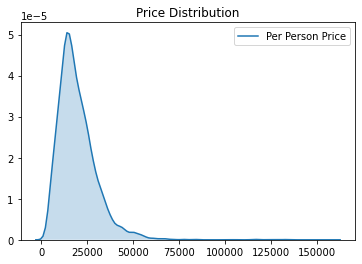

In [36]:
%matplotlib inline
sns.kdeplot(data=sub['Per Person Price'],shade=True)
plt.title('Price Distribution')
plt.show()

In [44]:
train.head()

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,30-07-2021,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0
1,178f892630ce3e335a5a41d5d83937fd,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,08-12-2021,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5
2,f060f2954840503cc2fdaf495357b7df,Might of Mewar- Udaipur and Chittorgarh,Luxury,Udaipur|Chittorgarh,2N Udaipur . 1N Chittorgarh,Udaipur|Chittorgarh,26-04-2021,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,New Delhi,IndiGo,0,4,Lake Pichola | Jag Mandir Palace | Saheliyon ...,Cancellation any time after making the 1st pay...,12421.5
3,32a19a6c171e67448f2346da46c619dc,Colorful Kerala ( Romantic Getaway ),Premium,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,Munnar|Kumarakom|Allepey|Kovalam and Poovar,27-08-2021,Elixir Hills Suites Resort & Spa-MMT Holidays ...,New Delhi,IndiGo,0,5,Mattupetty Dam | Echo Point | Tata Tea Museum...,Cancellation any time after making the 1st pay...,35967.0
4,107b068aa0ca03bc6248966f594d105f,A Week In Bangkok & Pattaya,Premium,Pattaya|Bangkok,4N Pattaya . 3N Bangkok,Pattaya|Bangkok,12-12-2021,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,New Delhi,Spicejet|Go Air,0,5,"Coral Island Tour with Indian Lunch, Join Spe...",Cancellation any time after making the 1st pay...,25584.0


In [ ]:
oe.inverse_transform

In [45]:
def inverse_ordinal_enc(df, col):
    df[col] = oe.inverse_transform(df[col])
        
    return df

In [59]:
inverse_ordinal_enc(df2,cat_feature)

IndexError: index 9 is out of bounds for axis 0 with size 8

In [61]:
df2.head()

,Package Type,Destination,Start City,Flight Stops,Meals,Cancellation Rules,Per Person Price,Total Destinations Covered,Total Sightseeing Places Covered,Total days,...,Airline53,Airline54,Airline55,Airline56,Airline57,Airline58,Airline59,Airline60,Airline61,Airline62
0,4.0,417.0,0.0,2,3,5.0,11509.0,4,-1,6,...,0,0,0,0,0,0,0,0,0,0
1,3.0,533.0,1.0,0,5,0.0,22485.5,3,7,4,...,0,0,0,0,0,0,0,0,0,0
2,2.0,549.0,1.0,0,4,0.0,12421.5,2,8,3,...,0,0,0,0,0,0,0,0,0,0
3,3.0,329.0,1.0,0,5,0.0,35967.0,4,9,6,...,0,0,0,0,0,0,0,0,0,0
4,3.0,443.0,1.0,0,5,0.0,25584.0,2,2,7,...,1,0,0,0,0,0,0,0,0,0


In [63]:
df2['Cancellation Rules'].value_counts()

0.0    17574
9.0     2616
5.0      795
4.0        7
6.0        2
2.0        2
7.0        1
1.0        1
3.0        1
8.0        1
Name: Cancellation Rules, dtype: int64

In [52]:
cat_feature

['Start City', 'Package Type', 'Cancellation Rules', 'Destination']

In [53]:
set(train['Start City'])

{'Mumbai', 'New Delhi'}

In [54]:
set(train['Package Type'])

{'Budget', 'Deluxe', 'Luxury', 'Premium', 'Standard'}

In [55]:
set(train['Cancellation Rules'])

{'Cancellation any time after making the 1st payment instalment till the 2nd payment date:The entire amount paid as 1st payment instalment (deposit) would be non-refundable.Cancellation after 2nd payment instalment and before 3rd or final payment date:The total amount that was due at the 2nd payment instalment as per your payment schedule would be non-refundable; anything that you have paid over and above this amount would be refundable.Cancellation after 3rd or final payment date:The full amount paid by you would be non-refundable.',
 'GENERAL Please note that once your booking is confirmed, you will receive an e-mail as well as an SMS on your registered mobile number confirming your booking. However, if you would like to get in touch with us please call us on 0124-4859749. We are open from 8:00 am o?= 8:00 pm, seven days a week Please expect to receive your vouchers 72 hours before your departure date (subject to full payment of your package cost) Please note that these packages are 

In [56]:
set(train['Destination'])

{'Abu Dhabi',
 'Abu Dhabi|Dubai',
 'Agra',
 'Agra|Bharatpur|Jaipur|Nawalgarh|Jodhpur|Jaisalmer|Jodhpur|Kumbalgarh|Udaipur|Ajmer|Pushkar',
 'Agra|Gwalior|Orchha|Khajuraho',
 'Agra|Jaipur',
 'Agra|Jaipur|Jodhpur|Udaipur',
 'Agra|Lucknow|Varanasi',
 'Agra|Mathura',
 'Agra|New Delhi|Shimla|Manali|Chandigarh',
 'Ahmedabad|Jamnagar|Dwarka|Somnath|Ahmedabad|Udaipur',
 'Ajmer|Jaipur',
 'Ajmer|Pushkar',
 'Allepey',
 'Allepey|Kovalam and Poovar',
 'Allepey|Munnar',
 'Allepey|Munnar|Thekkady',
 'Allepey|Thekkady',
 'Allepey|Thekkady|Munnar',
 'Allepey|Varkala|Kovalam',
 'Alwar|Bharatpur',
 'Amritsar',
 'Amritsar|Dalhousie|Dharamshala',
 'Amritsar|Dalhousie|Dharamshala|Chandigarh',
 'Amritsar|Dalhousie|Dharamshala|Manali|Shimla|Chandigarh',
 'Amritsar|Dharamshala|Dalhousie',
 'Amritsar|Dharamshala|Dalhousie|Katra',
 'Amritsar|Dharamshala|Katra',
 'Amritsar|Manali|Shimla',
 'Amritsar|Palampur',
 'Amritsar|Shimla',
 'Amritsar|Shimla|Manali',
 'Anuradhapura|Sigiriya|Kandy|Nuwara Eliya|Yala|Galle|Bent

In [58]:
print(test.columns)

Index(['Package Type', 'Destination', 'Start City', 'Flight Stops', 'Meals',
       'Cancellation Rules', 'Total Destinations Covered',
       'Total Sightseeing Places Covered', 'Total days', 'Avg Rating',
       ...
       'Airline53', 'Airline54', 'Airline55', 'Airline56', 'Airline57',
       'Airline58', 'Airline59', 'Airline60', 'Airline61', 'Airline62'],
      dtype='object', length=4312)


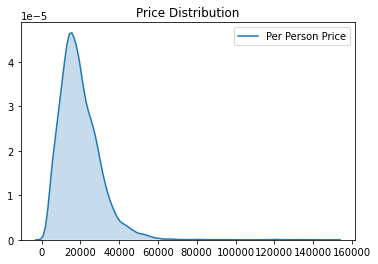

In [64]:
%matplotlib inline
sns.kdeplot(data=sub['Per Person Price'],shade=True)
plt.title('Price Distribution')
plt.show()

In [38]:
import pickle
# open a file, where you ant to store the data
file = open(r'D:\Downloads\Workkation Price Prediction\Participant_Data_WPPH\Flask Deployment\light_gradient_boosting_model.pkl', 'wb')

# dump information to that file
pickle.dump(model, file)

In [40]:
modelss = pickle.load(open(r'D:\Downloads\Workkation Price Prediction\Participant_Data_WPPH\Flask Deployment\light_gradient_boosting_model.pkl','rb'))

In [42]:
np.exp(modelss.predict(test))

array([19481.6516769 , 11861.47360919,  5348.7832591 , ...,
       16370.14232078, 21154.42660642,  9391.53154676])

In [64]:
test.to_csv(r"D:\Downloads\Workkation Price Prediction\Participant_Data_WPPH\Flask Deployment\tested.csv",index=False)